# Esercitazione 11

## Dati distribuiti lungo una retta

In questa prima parte dell'esercitazione devo lavorare sul fit di una retta. Devo provare a modificare il numero di epoche, l'incertezza sui dati e la quantità di dati di training in modo da migliorare il fit che si ottiene. Con i seguenti specchietti python posso fare queste simulazioni, controllare l'andamento della funzione loss e utilizzare la rete neurale per predire nuovi punti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Parametri della funzione f(x) = m*x + b
m = 2
b = 1

# Genera i dati di training
np.random.seed(2)
x_train = np.random.uniform(-1, 1, 1200)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b

# Aggiungi un rumore gaussiano alla curva esatta
sigma = 0.5
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [3]:
# Prepara il modello e compilalo
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Fai il fit del modello con i dati di training e di verifica
history = model.fit(x = x_train, y = y_train, 
          batch_size = 32, epochs = 30,
          shuffle = True, validation_data = (x_valid, y_valid))

Epoch 1/30
38/38 [==============================] - 3s 14ms/step - loss: 4.0916 - mse: 4.0916 - val_loss: 4.0388 - val_mse: 4.0388
Epoch 2/30
38/38 [==============================] - 0s 5ms/step - loss: 2.4219 - mse: 2.4219 - val_loss: 2.4223 - val_mse: 2.4223
Epoch 3/30
38/38 [==============================] - 0s 5ms/step - loss: 1.5309 - mse: 1.5309 - val_loss: 1.5331 - val_mse: 1.5331
Epoch 4/30
38/38 [==============================] - 0s 4ms/step - loss: 1.0133 - mse: 1.0133 - val_loss: 1.0306 - val_mse: 1.0306
Epoch 5/30
38/38 [==============================] - 0s 5ms/step - loss: 0.7077 - mse: 0.7077 - val_loss: 0.7338 - val_mse: 0.7338
Epoch 6/30
38/38 [==============================] - 0s 5ms/step - loss: 0.5229 - mse: 0.5229 - val_loss: 0.5570 - val_mse: 0.5570
Epoch 7/30
38/38 [==============================] - 0s 5ms/step - loss: 0.4106 - mse: 0.4106 - val_loss: 0.4525 - val_mse: 0.4525
Epoch 8/30
38/38 [==============================] - 0s 4ms/step - loss: 0.3426 - mse: 0.3

Pendenza =  [[2.0152757]]
Intercetta =  [1.0034541]


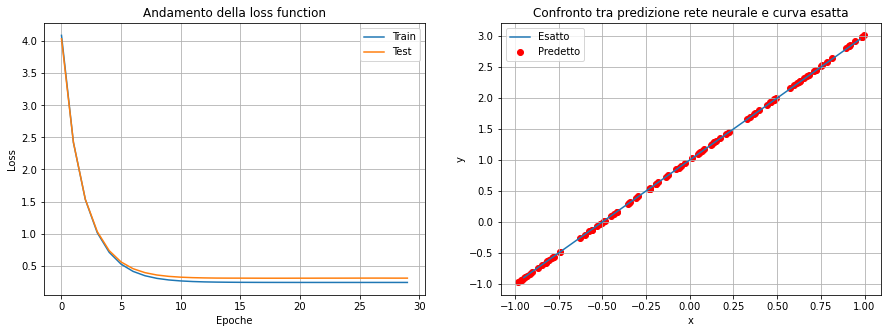

In [5]:
# Stampa il peso e il bias per confrontarli con la retta
print("Pendenza = ", model.get_weights()[0])
print("Intercetta = ", model.get_weights()[1])

# Plotta l'andamento della loss function sul dataset di training e di verifica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Andamento della loss function')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoche')
ax1.legend(['Train', 'Test'], loc='best')
ax1.grid()

# Prepara un campione per fare la predizione
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

# Plotta la predizione
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.set_title('Confronto tra predizione rete neurale e curva esatta')
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.legend(['Esatto', 'Predetto'], loc='best')
ax2.grid(True)

Provando cambiare il valore di $\sigma$ nell'intervallo $[0.1 , 2]$ i valori di pendenza e intercetta ottenuti dalla simulazione non variano. Cambiare il numero delle epoche serve per ottimizzare maggiormente i parametri, ma in questo caso non c'è bisogno perchè questi raggiungono un valore ottimale in poche epoche. Aumentare il numero di punti di training è la cosa che fa la differenza: maggiore è il numero dei dati, maggiore sarà la precisione. Questo comportamento è aspettato perchè con più informazione riesco a fare un fit migliore della retta. L'incremento della precisione con l'aumentare dei dati di training ha comunque un limite perchè l'ottimizzazione dipende anche dai dati di verifica, che però al momento non aumentano. 

Deve essere notato che nella simulazione è presente una forte dipendenza dai dati generati casualmente. Modificando il seme del generatore si ottengono risultati diversi e a volte il valore della loss della verifica diventa minore di quello del training. Questo probabilmente è dovuto al fatto che utilizzando soltanto $50$ dati per la verifica, cambiando generatore posso ottenere delle configurazioni molto diverse. Ho anche notato che facendo partire due volte di fila la stessa simulazione si ottengono risultati leggermente diversi, questo potrebbe essere dovuto all'utilizzo di un generatore di numeri casuali nel calcolo dell'ottimizzazione dei parametri a cui non ho fissato il seme.

## Dati distribuiti secondo f(x)

Nella seconda richiesta devo provare a cambiare il numero dei nodi nei layer, il numero dei layer, la funzione di attivazione, l'ottimizzatore e la funzione per la loss. Per le seguenti simulazioni utilizzo $30$ epoche, $5000$ dati di training e $500$ di verifica. In questo modo avendo più dati dovrei limitare la dipendenza del risultato dal seme scelto per il generatore di numeri casuali.

Ho notato che a volte quando faccio *model.fit* la loss non diminuisce mai e il risultato finale è una linea piatta. Quando questo capita, per ottenere una simulazione corretta devo soltanto fare ripartire lo specchietto python da capo finchè non vedo che la loss comincia a scendere. Il fatto che questo succeda soltanto alcune volte che faccio partire una simulazione mi lascia perplesso sulla natura di questo errore; l'unica mia ipotesi è che ci sia un bug nelle librerie di Keras.

In [6]:
# Funzione di cui devo calcolare il fit
def func(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

In [133]:
# Genera i dati di training
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = func(x_valid)

# Aggiungi un rumore gaussiano alla curva esatta
sigma = 0.1
y_train = np.random.normal(func(x_train), sigma)
y_valid = np.random.normal(func(x_valid), sigma)

In [134]:
# Prepara i layer
model = tf.keras.Sequential()
model.add(Dense(50, input_shape=(1,), activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation = "relu"))

# Compila 
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 50)                100       
_________________________________________________________________
dense_158 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_159 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_160 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_161 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 51        
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
_________________________________________________

In [135]:
# Fai il fit del modello con i dati di training e di verifica
history = model.fit(x = x_train, y = y_train, 
          batch_size = 32, epochs = 30,
          shuffle = True, validation_data = (x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 3s 7ms/step - loss: 1.9089 - mse: 1.9089 - val_loss: 0.0493 - val_mse: 0.0493
Epoch 2/30
157/157 [==============================] - 1s 5ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 3/30
157/157 [==============================] - 1s 6ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 4/30
157/157 [==============================] - 1s 5ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 5/30
157/157 [==============================] - 1s 5ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 6/30
157/157 [==============================] - 1s 5ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 7/30
157/157 [==============================] - 1s 5ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 8/30
157/157 [==============================] - 1s 5ms/step - loss: 0.

In [137]:
# Prepara un campione per la predizione
x_predicted = np.random.uniform(-1.2, 1.2, 100)
x_esatta = np.random.uniform(-1.2, 1.2, 500)
x_esatta.sort()
y_esatta = func(x_esatta)

# Salva in variabili diverse i valori ottenuti da diverse simulazioni
#y_3layer10 = model.predict(x_predicted)
#y_5layer10 = model.predict(x_predicted)
#y_3layer50 = model.predict(x_predicted)
#y_relu = model.predict(x_predicted)
#y_softplus = model.predict(x_predicted)
#y_tanh = model.predict(x_predicted)
#y_resoft = model.predict(x_predicted)
#y_adagrad = model.predict(x_predicted)
#y_nadam = model.predict(x_predicted)

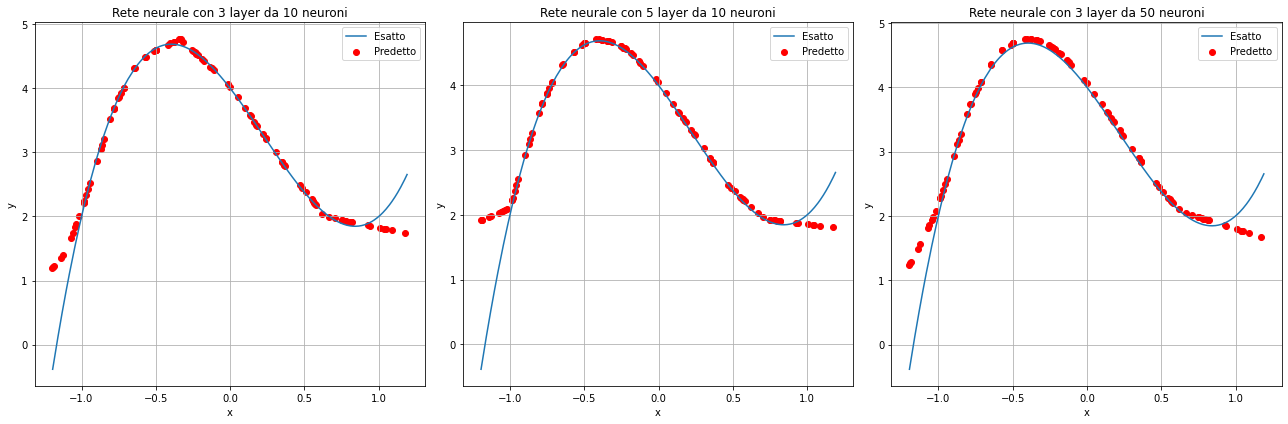

In [146]:
# Prepara le figure
fig, ax = plt.subplots(1, 3, figsize = (18, 6), tight_layout = True)
valori = [y_3layer10, y_5layer10, y_3layer50]

# Plotta i risultati
for i in range(3):
    ax[i].scatter(x_predicted, valori[i], color='r')
    ax[i].plot(x_esatta, y_esatta)
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend(['Esatto', 'Predetto'], loc='best')
    ax[i].grid(True)
    
ax[0].set_title("Rete neurale con 3 layer da 10 neuroni")
ax[1].set_title("Rete neurale con 5 layer da 10 neuroni")
ax[2].set_title("Rete neurale con 3 layer da 50 neuroni")
plt.show()

Ho deciso di cominciare a fare simulazioni utilizzando una rete neurale costituita da tre layer da $10$ neuroni ciascuno e un layer finale con un solo nodo. Al momento utilizzo delle ReLU come funzioni di attivazione per tutti i layer, lo stochastic gradient descent come ottimizzatore e il mean square error come loss. Da questa prima simulazione ho ottenuto una rete neurale che riesce a riprodurre in modo buono la funzione polinomiale. Il problema di questa rete è il fatto che i dati predetti, nonostante giacciano sulla curva desiderata, sembrano essere disposti lungo dei segmenti.

Per cercare di ovviare a questo problema ho aggiunto altri due layer contenenti $10$ neuroni ognuno con attivazione ReLU. In questo secondo grafico sono riuscito ad ottenere un andamento più liscio della curva. Un altro modo per risolvere il problema del primo grafico è aumentare il numero dei nodi dei layer. Nel terzo grafico utilizzo nuovamente solo quattro layer, ma adesso i primi tre contengono $50$ nodi ciascuno. Anche in questo caso sono riuscito a ottenere un andamento più liscio. 

All'interno dell'intervallo di training $[-1, 1]$ i grafici mostrano che le reti neurali sono riuscite a ottenere il valore corretto della funzione. Fuori da questo intervallo notiamo che non riescono più a riprodurre l'andamento del polinomio. Nelle prossime simulazioni utilizzo diverse funzioni di attivazione.

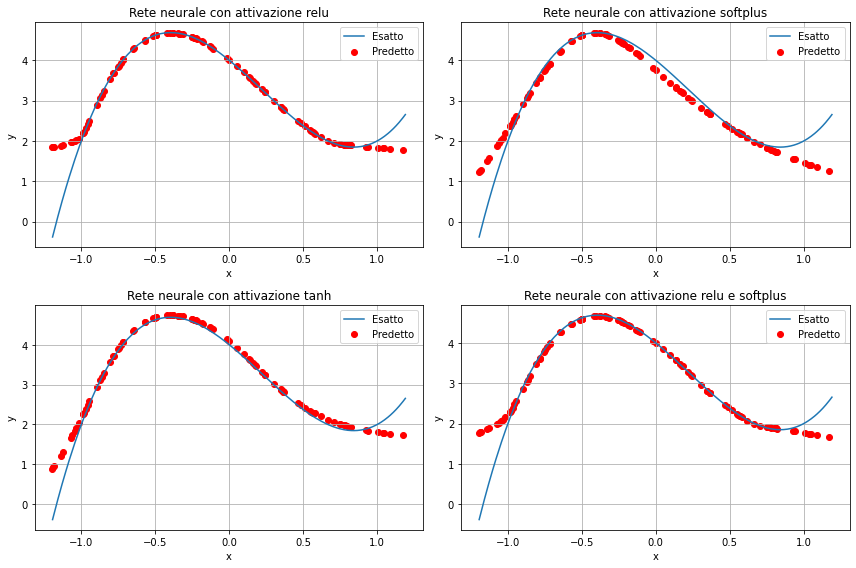

In [147]:
# Prepara le figure
fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout = True)
ax = ax.reshape(-1)
valori = [y_relu, y_softplus, y_tanh, y_resoft]

# Plotta i risultati
for i in range(4):
    ax[i].scatter(x_predicted, valori[i], color='r')
    ax[i].plot(x_esatta, y_esatta)
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend(['Esatto', 'Predetto'], loc='best')
    ax[i].grid(True)
    
ax[0].set_title("Rete neurale con attivazione relu")
ax[1].set_title("Rete neurale con attivazione softplus")
ax[2].set_title("Rete neurale con attivazione tanh")
ax[3].set_title("Rete neurale con attivazione relu e softplus")
plt.show()

In queste simulazioni ho utilizzato $5$ layer con $50$ neuroni in modo da applicare entrambe ottimizzazioni viste nei grafici precedenti. Nella prima simulazione ho utilizzato una ReLU come attivazione per ogni layer, questo è quindi analogo ai grafici precedenti. Nella seconda ho sostiuito le ReLU con delle softplus. Dal grafico vediamo che la predizione non è precisa come con la ReLU, inoltre la forma ottenuta ricorda due esponenziali decrescenti, andamento che ci possiamo aspettare dalla softplus.

Nella terza simulazione ho utilizzato delle tanh, ma questa volta l'ultimo nodo usa una ReLU e al posto della tanh. Questo è dovuto al fatto che la tanh è limitata: usarla come attivazione nell'ultimo porta a dei valori finali compresi in $[-1, 1]$, cioè minore di quelli che voglio predire. Dal grafico vediamo che riproduce in modo corretto la funzione polinomiale, sovrastimandola leggermente soltanto intorno al minimo. Nel quarto grafico ho alternato layer con attivazione ReLU e softplus, il risultato è analogo a quello con solo ReLU. Infine notiamo che anche in questo caso le reti neurali predicono correttamente soltanto nell'intervallo dei dati usati per il training.

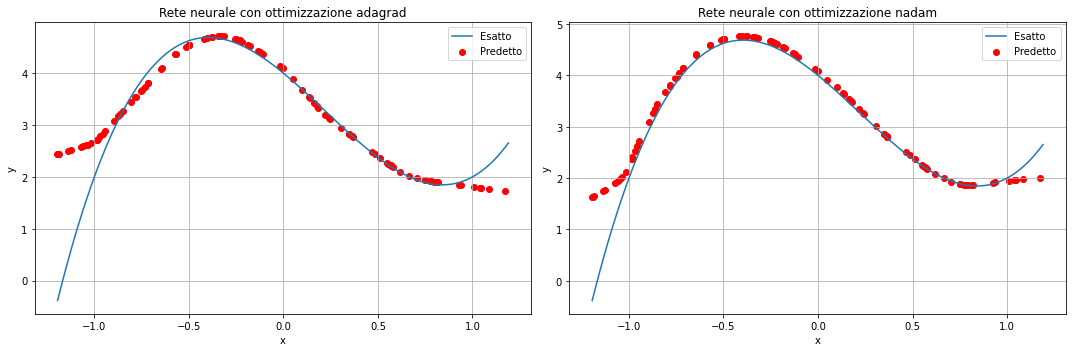

In [149]:
# Prepara le figure
fig, ax = plt.subplots(1, 2, figsize = (15, 5), tight_layout = True)
valori = [y_adagrad, y_nadam]

# Plotta i risultati
for i in range(2):
    ax[i].scatter(x_predicted, valori[i], color='r')
    ax[i].plot(x_esatta, y_esatta)
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend(['Esatto', 'Predetto'], loc='best')
    ax[i].grid(True)
    
ax[0].set_title("Rete neurale con ottimizzazione adagrad")
ax[1].set_title("Rete neurale con ottimizzazione nadam")
plt.show()

In queste due simulazioni ho usato come funzione di attivazione delle ReLU e poi ho cambiato l'ottimizzatore. Nel primo grafico si vede l'utilizzo di AdaGrad; questa è l'unica simulazione che ho fatto utilizzando $50$ epoche al posto di $30$. Il motivo del maggior numero di epoche è che l'ottimizzazione era lenta, di conseguenza non aumentando il numero delle epoche ottenevo risultati pessimi. Nonostante la simulazione più lunga, il risultato non è buono come quello dato dallo stochastic gradient descent. 

Nella seconda simulazione ho utilizzato Nadam, questo porta a risultati analoghi a quelli ottenuti con lo SGD se non leggermente migliori, infatti ottiene un accordo migliore con la funzione polinomiale in corrispondenza del minimo. Anche modificando l'ottimizzatore notiamo che la rete neurale non riesce dare il valore corretto nella zona campionata. Come ultima simulazione provo a cambiare la funzione loss da mean square error a mean absolute error, usando come attivazione una ReLU e come ottimizzatore lo stochastic gradient descent. Noto che i risultati sono analoghi a quelli ottenuti con il MSE, perciò non riporto il grafico.

## Dati distribuiti secondo f(x, y)

In questo ultimo esercizio devo usare una rete neurale per riuscire a ottenere il fit di una funzione di due variabili. Ho deciso di utilizzare $5000$ dati di training e $500$ di verifica come per il polinomio. In questo caso poichè devo fare il fit su due variabili aumento il numero dei nodi per layer da $50$ a $100$ in modo da avere una rete neurale che riesca a descrivere meglio la funzione. Per l'attivazione uso delle ReLU, come ottimizzatore lo stochastic gradient descent e come loss il mean square error.

In [150]:
# Funzione di cui devo calcolare il fit
def fun(x,y):
    return np.sin(x**2 + y**2)

In [171]:
# Genera i dati di training
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, (5000, 2))
x_valid = np.random.uniform(-1.5, 1.5, (500, 2))
y_target = fun(x_valid[:,0], x_valid[:,1])

# Aggiungi un rumore gaussiano alla misura esatta
sigma = 0.2
y_train = np.random.normal(fun(x_train[:,0], x_train[:,1]), sigma)
y_valid = np.random.normal(y_target, sigma)

In [172]:
# Prepara i layer
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(2,), activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation = "relu"))

# Compila
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_170 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_171 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_172 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_173 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 101       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________

In [173]:
# Fai il fit del modello con i dati di training e di verifica
history = model.fit(x=x_train, y=y_train, 
          batch_size=50, epochs=50,
          shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 0.2439 - mse: 0.2439 - val_loss: 0.1649 - val_mse: 0.1649
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1810 - mse: 0.1810 - val_loss: 0.1644 - val_mse: 0.1644
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1770 - mse: 0.1770 - val_loss: 0.1592 - val_mse: 0.1592
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1729 - mse: 0.1729 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1688 - mse: 0.1688 - val_loss: 0.1537 - val_mse: 0.1537
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1647 - mse: 0.1647 - val_loss: 0.1502 - val_mse: 0.1502
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 8/50
100/100 [==============================] - 1s 6ms/step - loss: 0.

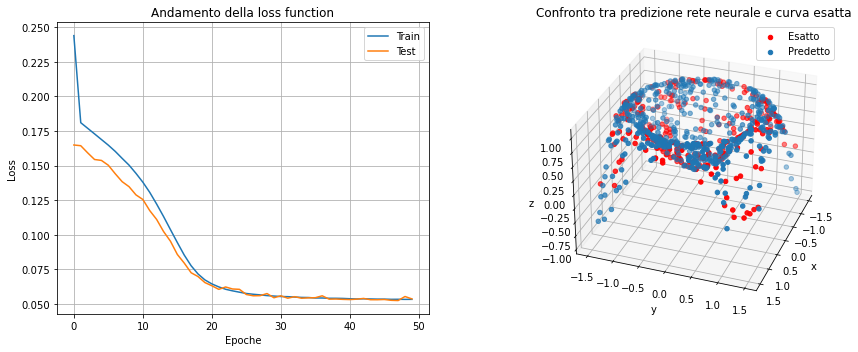

In [177]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

#Plotta l'andamento della loss function sul dataset di training e di verifica
fig = plt.figure(figsize=(15,5), tight_layout = True)
gs = GridSpec(1, 2, width_ratios=[1,2])
ax = fig.add_subplot(gs[0,0])
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Andamento della loss function')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoche')
ax.legend(['Train', 'Test'], loc='best')
ax.grid()

# Prepara un campione per fare la predizione
x_predicted = np.random.uniform(-1.5, 1.5, (300, 2))
y_predicted = model.predict(x_predicted)

# Plotta la predizione
ax = fig.add_subplot(gs[0,1], projection='3d')
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, c="r")
ax.scatter(x_valid[:,0], x_valid[:,1], y_target)
ax.set_title('Confronto tra predizione rete neurale e curva esatta')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 20)
ax.legend(['Esatto', 'Predetto'], loc='best')
ax.grid(True)

Dall'andamento della loss possiamo dedurre di avere trovato i parametri ottimali, o comunque dei parametri molto buoni. Nel grafico a fianco. anche se non di facile lettura, possiamo vedere che i dati predetti concordano con quelli esatti. Siamo quindi riusciti a utilizzare una rete neurale per predire i valori di questa funzione di due variabili.